In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/final_data/all_final.csv")
df['descrip_lang'] = df['descrip_lang'].apply(lambda x: "zh" if x=="zh-Hant" else x)
df['year'] = df['year'].apply(lambda x: str(x).split(".")[0])
df = df[df['year']!="nan"]
df.head(1)

,dataset,url,title,description,domain,domain_end,year,20_snippet,50_snippet,title_lang,descrip_lang,manual_lang,image,start_date,end_date,citation,page,search_url
1,rimage,https://www.wired.com/story/finding-lena-the-p...,"Finding Lena Forsen, the Patron Saint of JPEGs...","Jan 31, 2019 — In 1973, a photo of a Swedish P...",www.wired.com,com,2019,playboy model named lena (left) was used to,"in 1973, a photo of a swedish playboy model n...",en,en,english,lenna.png,NaN,NaN,NaN,0,http://www.google.com/search?tbs=sbi:AMhZZisqf...


en 5298


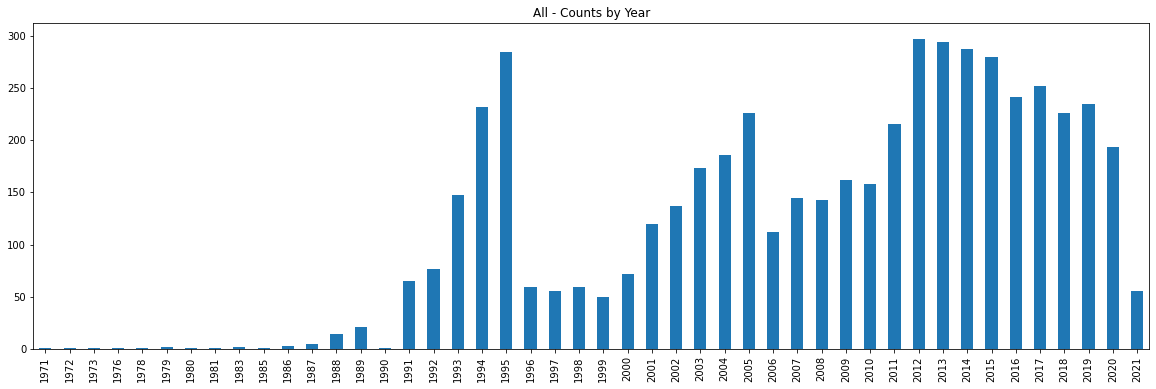

zh 105


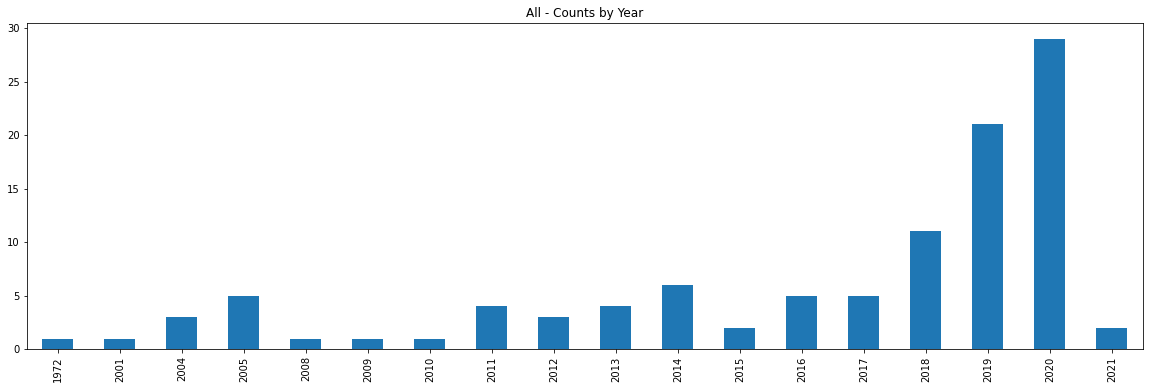

id 59


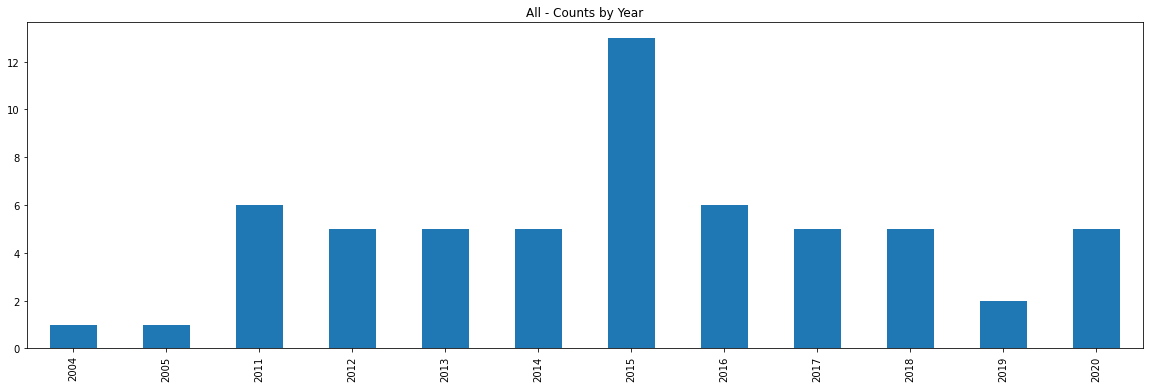

ko 39


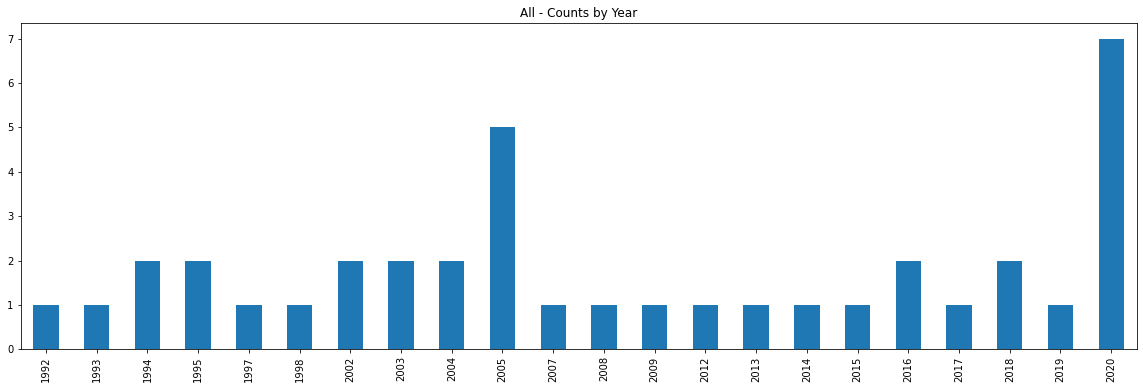

ja 35


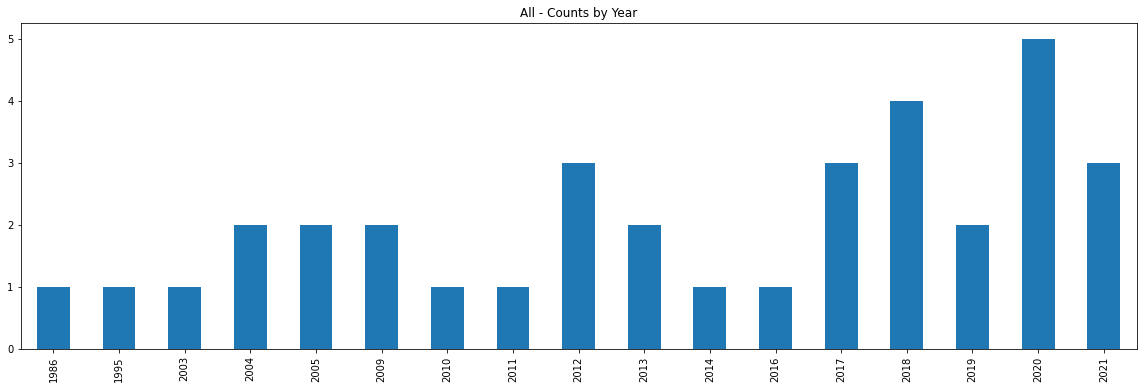

ru 33


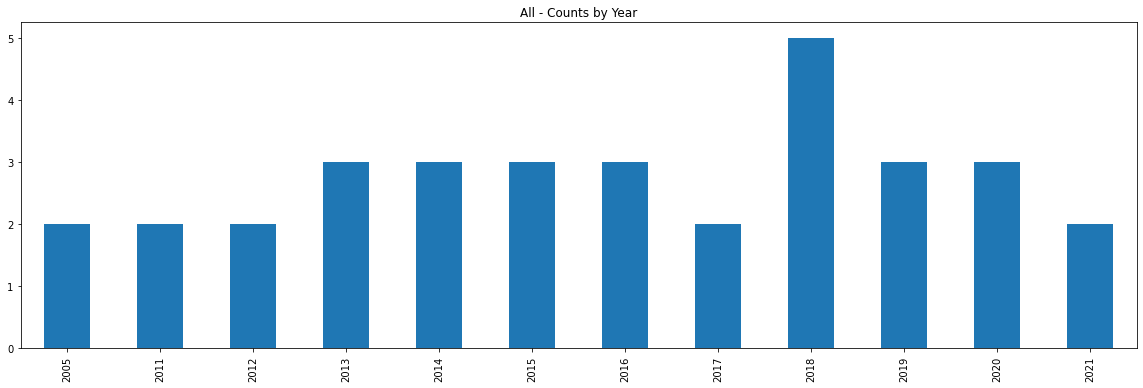

es 29


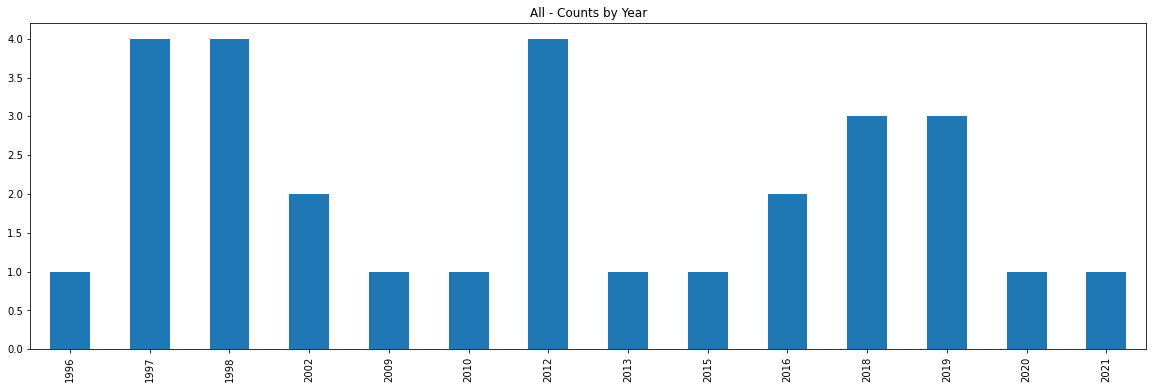

fr 16


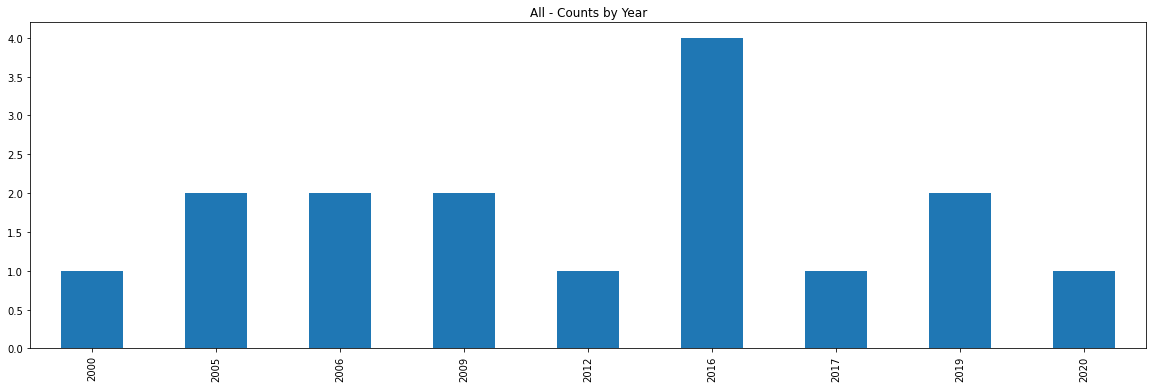

In [5]:
top_lang = df['descrip_lang'].value_counts().head(8).index.tolist()

for lang in top_lang:
    df_lang = df[df['descrip_lang']==lang]
    print(lang, len(df_lang))
    
    fig, ax = plt.subplots(figsize=(20, 6))
    df_lang[(df_lang['year']>"1970")&(df_lang['year']<="2021")]['year'].astype(int).value_counts().sort_index().plot(kind="bar")
    plt.title("All - Counts by Year")
    plt.show()